## ULMfit sentiment model

**Importing necessary libraries**

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import fastai
import wget
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
from fastai.text import * 
from fastai.callbacks import *
import os

In [3]:
data = pd.read_csv('B:/Projects/ULMfit model/Tweets.csv')

In [4]:
data.shape

(14640, 15)

In [5]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Part 1 - Data Analysis

In [6]:
total_null_values = data.isnull().sum().sum()
total_values = data.shape[0]*data.shape[1]
print('Total null values = {}'.format(total_null_values))
print('Total values = {}'.format(total_values))
print("% null values = {}".format(total_null_values/total_values*100))

Total null values = 61962
Total values = 219600
% null values = 28.21584699453552


In [7]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [8]:
# Gist of null values column wise

data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

## Part 2 - Data Cleaning

Dropping `unnecessary` columns

In [9]:
data.drop('airline_sentiment_gold', axis=1, inplace=True)
data.drop('negativereason_gold', axis=1, inplace=True)
data.drop('tweet_coord', axis=1, inplace=True)
data.drop('tweet_location', axis=1, inplace=True)
data.drop('user_timezone', axis=1, inplace=True)

In [10]:
data.isnull().sum()

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence       4118
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
user_timezone                   4820
dtype: int64

###### Null values left after dropping some columns

In [11]:
data.isnull().sum().sum()

19133

`negativereason_confidence`, `negativereason` **is an important column so we need to fill it with some relevant values**

In [12]:
data['negativereason_confidence'] = data['negativereason_confidence'].fillna(data['negativereason_confidence'].mean())

In [13]:
data.isnull().sum().sum()

15015

In [14]:
data['negativereason'] = data['negativereason'].fillna('Not Negative')

In [15]:
data.isnull().sum()

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                     0
negativereason_confidence          0
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
user_timezone                   4820
dtype: int64

In [18]:
data.isnull().sum().sum()

0

**Now we have successfully cleaned our data as there are no null values left**

In [52]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,Not Negative,0.638298,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,Not Available,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,Not Negative,0.000000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,Not Available,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,Not Negative,0.638298,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.703300,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,Not Available,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.000000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,Not Available,Pacific Time (US & Canada)


## Part 3 - WordCloud

In [19]:
negative=data[data['airline_sentiment']=='negative']
words = ' '.join(negative['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [20]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

In [21]:
cleaned_word

'it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse and it\'s a really big bad thing about it seriously would pay $30 a flight for seats that didn\'t have this playing. it\'s really the only bad thing about flying VA SFO-PDX schedule is still MIA. I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! why are your first fares in May over three times more than other carriers when all seats are available to select??? you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet status match program. I applied and it\'s been three weeks. Called and emailed with no response. What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be able 2 eat anything for next 6 hrs #fail amazing to me that we can\'t get any cold air from the vents. #VX358 #noair #worstflightever #roasted

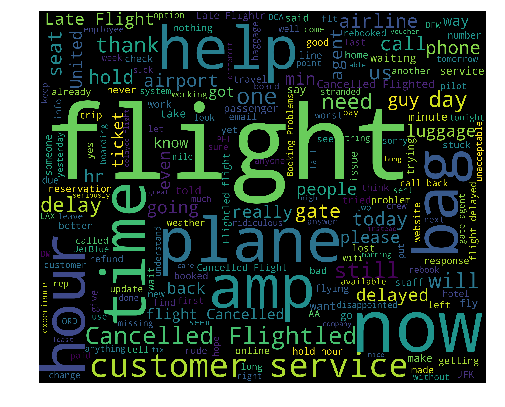

In [22]:
plt.figure(1,figsize=(8, 14))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Part 4 - Data Visualization

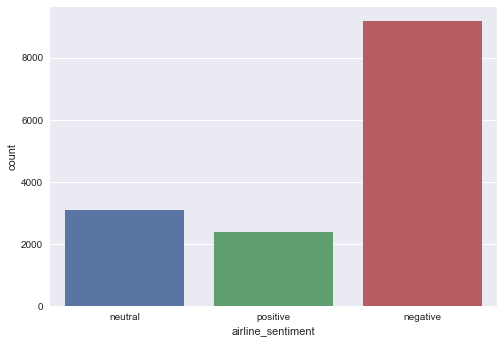

In [23]:
plt.style.use('seaborn')
sns.countplot(data=data,x='airline_sentiment')

Text(0, 0.5, 'Retweet-count')

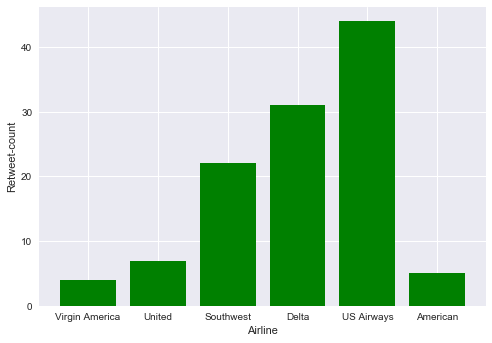

In [24]:
plt.bar(data['airline'], data['retweet_count'], color='green')
plt.xlabel('Airline')
plt.ylabel('Retweet-count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015DAEC74B00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000015DB89BFC50>]], dtype=object)

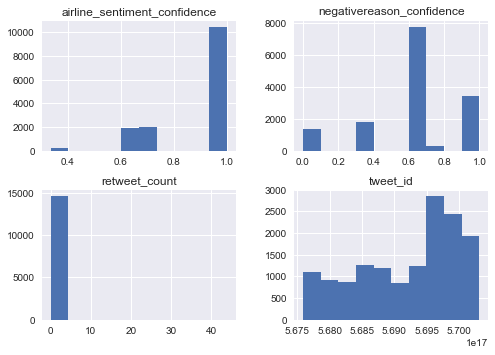

In [25]:
data.hist()

## Part 5 - Data Modelling

In [26]:
from sklearn.model_selection import train_test_split

In [27]:

# split data into training and validation set
df_trn, df_val = train_test_split(data, test_size = 0.4, random_state = 12)

In [28]:
df_trn.shape, df_val.shape

((8784, 12), (5856, 12))

In [29]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)

C:\Users\Shray\Anaconda3\lib\site-packages\fastai\data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
570239376283676672, 568451040397422593, 569926674353160192, 567825891209912320, 569930292024221696...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [30]:
#learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
learn = language_model_learner(data_lm,  arch = AWD_LSTM, pretrained = True, drop_mult=0.3)

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.31E-02
Min loss divided by 10: 3.31E-01


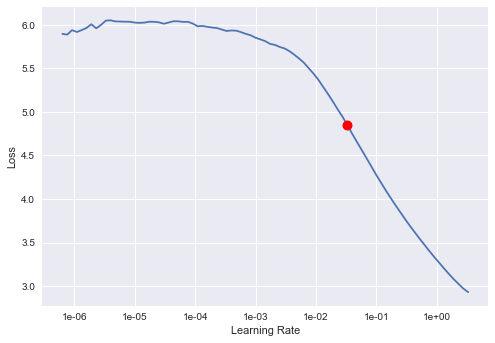

In [32]:
learn.recorder.plot(suggestion=True)

In [33]:
learn.fit_one_cycle(2, 5.75E-02,callbacks=[SaveModelCallback(learn, name="best_lm")], moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.797757,0.972211,0.608557,00:35
1,2.941702,0.607484,0.773289,00:36


Better model found at epoch 0 with valid_loss value: 0.9722110629081726.
Better model found at epoch 1 with valid_loss value: 0.6074836850166321.


In [34]:
learn.save('fit_head')

In [35]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.37E-05
Min loss divided by 10: 4.37E-02


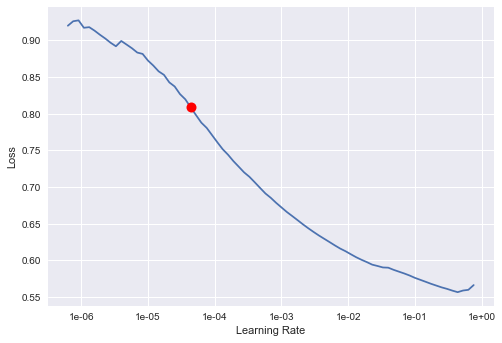

In [36]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [37]:
learn.fit_one_cycle(3,3.98E-04,callbacks=[SaveModelCallback(learn, name="best_lm")], moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.721944,0.502371,0.815179,01:12
1,0.607875,0.467464,0.815179,01:06
2,0.564672,0.464323,0.815179,01:03


Better model found at epoch 0 with valid_loss value: 0.5023710131645203.
Better model found at epoch 1 with valid_loss value: 0.4674638509750366.
Better model found at epoch 2 with valid_loss value: 0.4643230140209198.


In [38]:
learn.load('best_lm')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (8784 items)
x: LMTextList
xxbos negative,xxbos negative,xxbos negative,xxbos neutral,xxbos negative
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (5856 items)
x: LMTextList
xxbos negative,xxbos positive,xxbos negative,xxbos negative,xxbos negative
y: LMLabelList
,,,,
Path: .;

Test: None, model=SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(16, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(16, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in

In [39]:
learn.save_encoder('AIBoot_enc')

In [40]:
learn1 = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3)

In [41]:
learn1.load_encoder('AIBoot_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (8784 items)
x: TextList
xxbos negative,xxbos negative,xxbos negative,xxbos neutral,xxbos negative
y: CategoryList
570275010759102466,569900620095856640,569683334311366656,570301083672813571,568122371854307328
Path: .;

Valid: LabelList (5856 items)
x: TextList
xxbos negative,xxbos negative,xxbos negative,xxbos negative,xxbos negative
y: CategoryList
0,0,0,0,0
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(16, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(16, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
   

In [42]:
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.532091,1.718926,0.605952,01:00
1,0.761018,0.504099,0.815104,00:59
2,0.662584,0.470331,0.813988,01:01


In [43]:
learn.save_encoder('ft_enc')

In [46]:
learn = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.7)
learn.load_encoder('ft_enc')
learn.fit_one_cycle(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,9.727610,8.313981,0.000000,09:49
1,9.228783,9.665410,0.000000,08:23


In [47]:
# get predictions
preds, targets = learn.get_preds()

predictions = np.argmax(preds, axis = 1)
pd.crosstab(predictions, targets)

col_0,0
row_0,
8507,5856


### Thank you for providing me this opportunitity.
#### Though it was my first time working with `ULMfit` model, I enjoyed alot learning about it and I tried my best.
Once again, Thanks a alot!